In [ ]:
1. Data should not have any missing values
2. Extract Features and Target
3. Features should be of numeric nature
4. Features should have some rows and some columns
5. Features are of the type array/ dataframe
6. Split the dataset into- training and testing datasets
7. Features should be on the same scale
8. Train the model on the training dataset
9. Test the model on the testing dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:/Datasets/train (1).csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 1. Data should not have any missing values


In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [5]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [6]:
ColumnsWithMistakes=["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
                    "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [7]:
df[ColumnsWithMistakes]=df[ColumnsWithMistakes].fillna("Not Available")

In [8]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
dtype: int64

In [9]:
df.shape

(1460, 81)

Mean- Numeric, Continuous, very few outliers
Median- Numeric, continuous, has many outliers
Mode- Numeric/ Non-Numeric, Categorical

In [10]:
df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [11]:
import seaborn as sns

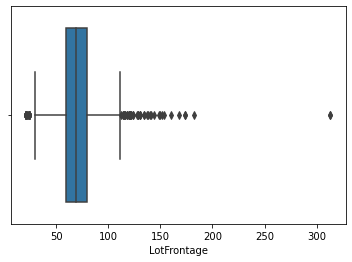

In [12]:
sns.boxplot(df["LotFrontage"])

In [13]:
df["LotFrontage"].fillna(df["LotFrontage"].median(),inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
dtype: int64

In [15]:
df["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [16]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0],inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending=False).head(20)

MasVnrType      8
MasVnrArea      8
Electrical      1
SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
ExterQual       0
ExterCond       0
BsmtQual        0
YearRemodAdd    0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
RoofStyle       0
dtype: int64

In [18]:
df["MasVnrType"]

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

1. Subset the column of interest
2. Convert the value to boolean using a condition
3. surround with dataframeReference[..code uptil step 2..]

In [19]:
df=df[df["MasVnrType"].notna()]

In [20]:
df.shape

(1452, 81)

In [21]:
df.isnull().sum().sort_values(ascending=False).head(20)

Electrical      1
SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
YearRemodAdd    0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
RoofStyle       0
dtype: int64

In [22]:
df=df[df["Electrical"].notna()]


In [23]:
df.shape

(1451, 81)

In [24]:
df.isnull().sum().sort_values(ascending=False).head(20)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

# 2. Extract Features and Target


In [25]:
y=df["SalePrice"]

In [26]:
X=df.drop("SalePrice",axis="columns")

In [27]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,MnPrv,Not Available,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Not Available,Reg,Lvl,AllPub,...,0,0,Not Available,Not Available,Not Available,0,4,2010,WD,Normal


In [28]:
X=X.drop("Id",axis="columns")

In [29]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,...,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,MnPrv,Not Available,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,4,2010,WD,Normal


# 3. Features should be of numeric nature


In [30]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,...,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,...,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,MnPrv,Not Available,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Not Available,Reg,Lvl,AllPub,Inside,...,0,0,Not Available,Not Available,Not Available,0,4,2010,WD,Normal


In [31]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [32]:
X.dtypes=="object"

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
Length: 79, dtype: bool

In [33]:
NonNumericColumns=X.columns[X.dtypes=="object"]

In [34]:
NonNumericColumns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
X=pd.get_dummies(X,columns=NonNumericColumns,drop_first=True)

# 4. Features should have some rows and some columns


In [36]:
X.shape

(1451, 259)

# 5. Features are of the type array/ dataframe


In [37]:
type(X)

pandas.core.frame.DataFrame

# 6. Split the dataset into- training and testing datasets


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# 7. Features should be on the same scale


In [40]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,...,0.003446,0.003446,0.082012,0.002068,0.869056,0.002757,0.007581,0.013784,0.822192,0.084080
std,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,...,0.058621,0.058621,0.274478,0.045439,0.337456,0.052450,0.086768,0.116632,0.382483,0.277603
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler()

In [43]:
X_train=scaler.fit_transform(X_train)

In [44]:
X_test=scaler.transform(X_test)

# 8. Train the model on the training dataset


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge=Ridge()

In [48]:
model=GridSearchCV(ridge,param_grid={"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10,20,50,100,200,500,1000]},cv=3,
                   return_train_score=True)

In [49]:
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]},
             return_train_score=True)

In [50]:
pd.DataFrame(model.cv_results_)[["param_alpha","mean_test_score","mean_train_score"]].sort_values(by="mean_test_score",ascending=False)

,param_alpha,mean_test_score,mean_train_score
11,5,0.867465,0.923347
10,2,0.865514,0.932986
12,10,0.862982,0.910594
9,1,0.861146,0.937208
8,0.9,0.860382,0.937692
7,0.8,0.859512,0.938193
6,0.7,0.858513,0.938710
5,0.6,0.857351,0.939247
4,0.5,0.855982,0.939804
3,0.4,0.854338,0.940384


In [51]:
from sklearn.linear_model import Ridge

In [52]:
model=Ridge(alpha=5)

In [53]:
model.fit(X_train,y_train)

Ridge(alpha=5)

In [54]:
model.score(X_test,y_test)

0.7212919335751276